In [1]:
import numpy as np
import os
from netCDF4 import Dataset
import matplotlib.pyplot as plt
%matplotlib inline
from osgeo import gdal
import scipy.io as sio

#### Option 1: Load data from a geoTIFF file
<pre>
gdata = gdal.Open(<span style="color:#cc7a00"><b>'GEOTIFF_FILE.tif'</b></span>)
geo = gdata.GetGeoTransform()
data = gdata.ReadAsArray()
</pre>

#### Option 2: Load data from a Matlab file
<pre>
matfile  = sio.loadmat(<span style="color:#cc7a00"><b>'MATLAB_FILE.mat'</b></span>)
data = matfile[<span style="color:#cc7a00"><b>'VARIABLE_TOPOGRAPHY'</b></span>]
</pre>


In [2]:
gdata = gdal.Open('MAAS_topo.tif')
geo = gdata.GetGeoTransform()
data = gdata.ReadAsArray()



#matfile  = sio.loadmat('EBI_topo.mat')
#data = matfile['Ori_DEM']

Topography_input = data
# Check/create folder and topography file name
folder = 'data'
filename_output = 'topography.nc'
if not os.path.exists(folder):
    os.makedirs(folder)

################################################################
# DO NOT CHANGE BELOW THIS LINE --------------------------------
################################################################

topography = Dataset(folder + '/' + filename_output, 'w', format='NETCDF4')
topography.description = 'Topography Data for Dhara'

# Get dimension
My,Nx  = Topography_input.shape

# Set up dimension for topography in NetCDF
topography.createDimension('y', My)
topography.createDimension('x', Nx)

"""
Create variables in the netcdf file
    var = netcdf.createVariable('Var_name', 'var_type', ('dimension_type'))
"""
Ztopo = topography.createVariable('Topography', 'f8', ('y','x'))

# Assign data to variables in NetCDF file
Ztopo[:] = Topography_input

# Close the file
topography.close()

#### If you want to visualize topography, run the command below

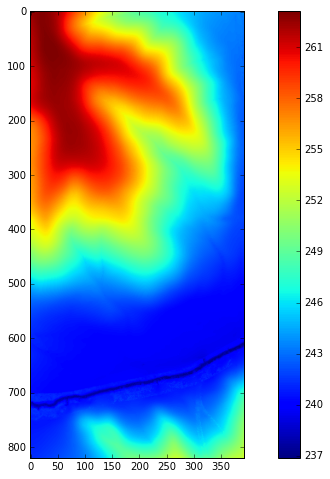

In [3]:
# Plot topography for checking
fig,ax = plt.subplots(figsize=(12,8))
im = ax.imshow(Topography_input, cmap=plt.cm.jet)
fig.colorbar(im, ax=ax)
plt.show()